## Word Embeddings, Clustering and Vectorization Workshop
Tutorial for extracting word embeddings from words.<br>

## Part 1: Vector Stores and Dimensionality Reduction

### 🔤 Introduction to Word2Vec

**What is Word2Vec?**

Word2Vec is a popular algorithm used in Natural Language Processing (NLP) to transform words into vector representations.
It learns these word vectors (embeddings) from a large collection of text so that words with similar meanings are located close to each other in a high-dimensional space.

**Who developed it and when?**

Word2Vec was developed by a team of researchers at Google, led by Tomas Mikolov, in 2013.

**Who currently maintains and supports new releases?**

While the original research came from Google, the open-source Python library gensim now maintains Word2Vec functionality.
gensim is maintained by the open-source community, originally developed by Radim Řehůřek.

### 🔤 Word2Vec embeddings using the Gensim library

Word2Vec is a popular technique for learning word embeddings, which are dense vector representations of words that capture semantic relationships between words based on their context.<br>
As discussed, Word2Vec have 2 types, Skipgrams and CBOW. Where SkipGrams are trained to predict context words given the target word, however CBOW is trained to predict target words given its context.


- Requirements: downloading punkt from nltk, and installing gensim library

In [1]:
# importing needed libraries
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import re
import os

# Warning: This download will copy files to your home directory.
# For example, on Linux, it will copy files to ~/.nltk_data.
# In Windows, it will copy files to C:\Users\YourAccount\AppData\Roaming
# nltk.download('punkt')

# A better way to handle the download is to:
# Ensure 'punkt' is available and nltk_data path is set
nltk_data_path = os.path.join(os.getcwd(), 'nltk_data')
print("Downloading 'punkt' tokenizer...")
nltk.download('punkt', download_dir=nltk_data_path, force=True)
print("Downloading 'punkt_tab' tokenizer...")
nltk.download('punkt_tab', download_dir=nltk_data_path, force=True)

# Always append the custom nltk_data path (if not already present)
if nltk_data_path not in nltk.data.path:
    nltk.data.path.append(nltk_data_path)

# Debugging paths and contents
print("NLTK Data Paths:", nltk.data.path)
print("Contents of nltk_data:", os.listdir(nltk_data_path))

[nltk_data] Downloading package punkt to
[nltk_data]     c:\Users\Adecarvalhoalvarezz\Documents\Machine
[nltk_data]     Learning\Week 13 LSA SVD Word2Vec\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


[nltk_data] Downloading package punkt_tab to
[nltk_data]     c:\Users\Adecarvalhoalvarezz\Documents\Machine
[nltk_data]     Learning\Week 13 LSA SVD Word2Vec\nltk_data...


NLTK Data Paths: ['C:\\Users\\Adecarvalhoalvarezz/nltk_data', 'c:\\Users\\Adecarvalhoalvarezz\\AppData\\Local\\anaconda3\\nltk_data', 'c:\\Users\\Adecarvalhoalvarezz\\AppData\\Local\\anaconda3\\share\\nltk_data', 'c:\\Users\\Adecarvalhoalvarezz\\AppData\\Local\\anaconda3\\lib\\nltk_data', 'C:\\Users\\Adecarvalhoalvarezz\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'c:\\Users\\Adecarvalhoalvarezz\\Documents\\Machine Learning\\Week 13 LSA SVD Word2Vec\\nltk_data']
Contents of nltk_data: ['corpora', 'tokenizers']


[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


**How do I use Word2Vec in Python and Jupyter Notebooks?**

To use Word2Vec in Python, we typically start by following the NLP pipeline to produce a set of tokens:

In [2]:

# Sample Sentence
text = """
Natural language processing (NLP) is a subfield of artificial intelligence (AI) that focuses on the interaction between computers and humans through natural language. NLP techniques aim to enable computers to understand, interpret, and generate human language in a way that is both meaningful and contextually relevant.
"""
tokenized_words = word_tokenize(text.lower())

**What is a model in Word2Vec?**

A Word2Vec model is a trained neural network that maps words from your dataset to numerical vectors (embeddings).
The model learns word relationships based on how often they appear together in context.

After the model is trained, each word in your vocabulary is now represented by a vector of numbers that can be used in tasks like similarity, clustering, or classification.

#### 🧠 Explanation of the model creation instruction

- `sentences`: A list of tokenized sentences (in this case, [tokenized_words] means a list of words).
- `vector_size=100`: Each word will be represented by a vector with 100 dimensions.
- `window=5`: The model considers 5 words before and after the target word (context window).
- `min_count=1`: Include all words that appear at least once.
- `workers=4`: Uses 4 CPU threads to speed up training.

**This model will learn how words relate to each other and store them as vectors in its internal memory.**

In [3]:

# Create a model
model_word2Vec = Word2Vec(sentences=[tokenized_words], vector_size=100, 
                          window=5,  min_count=1, workers=4)


In [4]:

# Get word vector for a specific word
word = "natural"
vector_word2Vec = model_word2Vec.wv[word]
print(f"Word vector for '{word}' using Word2Vec: {vector_word2Vec}")


Word vector for 'natural' using Word2Vec: [-1.9428101e-03 -5.2659796e-03  9.4477097e-03 -9.2954319e-03
  4.5052692e-03  5.4033557e-03 -1.4071489e-03  9.0089496e-03
  9.8826429e-03 -5.4782177e-03 -6.0212663e-03 -6.7517818e-03
 -7.8889774e-03 -3.0443431e-03 -5.5920784e-03 -8.3447993e-03
  7.8853959e-04  2.9931944e-03  6.4117215e-03 -2.6343642e-03
 -4.4501973e-03  1.2521694e-03  3.9400163e-04  8.1163580e-03
  1.8195010e-04  7.2335410e-03 -8.2651470e-03  8.4343469e-03
 -1.8896088e-03  8.7051662e-03 -7.6160980e-03  1.7950600e-03
  1.0553870e-03  3.8771374e-05 -5.1055676e-03 -9.2426352e-03
 -7.2625973e-03 -7.9506449e-03  1.9089831e-03  4.7897184e-04
 -1.8130449e-03  7.1189236e-03 -2.4739422e-03 -1.3462100e-03
 -8.8952789e-03 -9.9256253e-03  8.9443158e-03 -5.7570883e-03
 -6.3713118e-03  5.1996382e-03  6.6684661e-03 -6.8323021e-03
  9.5778168e-04 -6.0134367e-03  1.6455727e-03 -4.2872936e-03
 -3.4413836e-03  2.1873817e-03  8.6617842e-03  6.7299707e-03
 -9.6773999e-03 -5.6279455e-03  7.8832312e-


#### 📊 Understanding Word Vectors in Word2Vec

#### 🔢 Code Recap

```python
# Get word vector for a specific word
word = "natural"
vector_word2Vec = model_word2Vec.wv[word]
print(f"Word vector for '{word}' using Word2Vec: {vector_word2Vec}")
```

This code retrieves the **vector representation (embedding)** of the word `"natural"` from the trained Word2Vec model.

#### 🧠 What Is a Word Vector?

In **Word2Vec**, every word in your vocabulary is represented by a **dense vector** of real numbers.

* Each word becomes a **point** in a high-dimensional space.
* Words that appear in similar contexts are placed **closer together**.
* These vectors are learned by a shallow neural network during training.

The output you see is a **vector with 100 dimensions**, because we set `vector_size=100` when training the model.

#### ✍️ What Do These Numbers Mean?

The output:

```python
[ 9.7677782e-03, 8.1660571e-03, ..., -2.3143364e-03 ]
```

...is a list of 100 floating-point numbers, like:

$$
\vec{v}_{\text{natural}} = [v_1, v_2, v_3, \ldots, v_{100}]
$$

This vector encodes the **semantic meaning** of the word *natural* based on its context in the training data.

While **each individual number doesn't mean anything by itself**, together they represent a **position** in a 100-dimensional space.

#### 🔍 Why Is This Useful?

You can perform various mathematical operations with these vectors:

#### **Similarity** between words

We can compute **cosine similarity** to check how similar two words are:

$$
\text{cosine\_similarity}(\vec{v}_a, \vec{v}_b) = \frac{\vec{v}_a \cdot \vec{v}_b}{\|\vec{v}_a\| \|\vec{v}_b\|}
$$

If two word vectors point in a similar direction (small angle), they are semantically similar.

#### 🧮 Summary

* The output is a **100-dimensional vector** for the word `"natural"`.
* Each dimension is a learned number that helps position the word in a semantic space.
* These vectors are powerful tools for **clustering**, **search**, **recommendations**, and more.


In [5]:

# Find similar words
similar_words_word2Vec = model_word2Vec.wv.most_similar(word)
print(f"Similar words to '{word}' using Word2Vec: {similar_words_word2Vec}")

Similar words to 'natural' using Word2Vec: [('subfield', 0.247703418135643), ('focuses', 0.23781007528305054), ('.', 0.15014640986919403), ('interpret', 0.14899645745754242), ('nlp', 0.1281408965587616), ('enable', 0.1139271929860115), ('humans', 0.09733927249908447), ('and', 0.09313160926103592), ('contextually', 0.0922219306230545), ('intelligence', 0.0911305770277977)]


#### 🔍 Finding Similar Words with Word2Vec

#### 🔢 Code Recap

```python
# Find similar words
similar_words_word2Vec = model_word2Vec.wv.most_similar(word)
print(f"Similar words to '{word}' using Word2Vec: {similar_words_word2Vec}")
```

This code retrieves the **top 10 words** that are most similar to the word `"natural"` according to the Word2Vec model.

#### 🧠 What Does “Similar” Mean in Word2Vec?

Word2Vec considers words to be similar if their **vector representations** are **close together** in high-dimensional space.

This closeness is measured using **cosine similarity**:

$$
\text{cosine\_similarity}(\vec{v}_a, \vec{v}_b) = \frac{\vec{v}_a \cdot \vec{v}_b}{\|\vec{v}_a\| \|\vec{v}_b\|}
$$

Where:

* $\vec{v}_a$ and $\vec{v}_b$ are the word vectors.
* $\cdot$ is the dot product.
* $\|\vec{v}\|$ is the magnitude (length) of vector $\vec{v}$.

This produces a value between **-1 and 1**:

* **1** → perfectly similar (same direction)
* **0** → no similarity (orthogonal)
* **-1** → completely opposite

#### 📤 Example Output Explained

```python
[('the', 0.182), ('computers', 0.173), ('nlp', 0.167), ('between', 0.156), ...]
```

This means:

| Word       | Cosine Similarity |
| ---------- | ----------------: |
| the        |             0.182 |
| computers  |             0.173 |
| nlp        |             0.167 |
| between    |             0.156 |
| way        |             0.133 |
| techniques |             0.122 |
| human      |             0.112 |
| is         |             0.111 |
| .          |             0.109 |
| in         |             0.097 |

These words appeared in **similar contexts** to `"natural"` in the training data.

💡 Example: If the training sentences included phrases like *"natural language processing"*, and also had *"nlp techniques"*, *"human language"*, or *"way computers process language"*, then `"nlp"`, `"human"`, `"techniques"`, and `"computers"` would naturally be nearby in vector space.

#### 🎯 Summary

* Word2Vec learned that these words tend to appear **in similar contexts** to `"natural"`.
* The similarity is calculated using **cosine similarity** on the word vectors.
* The output is a **ranked list** of the most contextually similar words.

You can use this method for:

* **Synonym detection**
* **Query expansion in search engines**
* **Exploring semantic relationships in text**


SKIPGRAM

In [6]:
# Create a model
model_skipGram = Word2Vec(sentences=[tokenized_words], vector_size=100, 
                          window=5,  min_count=1, workers=4, sg=1)

# Get word vector for a specific word
vector_skipGram = model_skipGram.wv[word]
print(f"Word vector for '{word}' using Word2Vec: {vector_skipGram}")

# Find similar words
similar_words_skipGrams = model_skipGram.wv.most_similar(word)
print(f"Similar words to '{word}' using Word2Vec: {similar_words_skipGrams}")

Word vector for 'natural' using Word2Vec: [-1.9321169e-03 -5.2483547e-03  9.4544906e-03 -9.2837224e-03
  4.4994610e-03  5.3914869e-03 -1.3959594e-03  9.0288678e-03
  9.8756803e-03 -5.4979529e-03 -6.0152854e-03 -6.7671919e-03
 -7.8648757e-03 -3.0349847e-03 -5.5805137e-03 -8.3396826e-03
  8.1575551e-04  2.9894954e-03  6.3903220e-03 -2.6621453e-03
 -4.4344361e-03  1.2641826e-03  4.0435637e-04  8.1096366e-03
  1.6329886e-04  7.2371974e-03 -8.2724625e-03  8.4320260e-03
 -1.8909355e-03  8.7151248e-03 -7.6115341e-03  1.7841731e-03
  1.0538050e-03  8.1357475e-06 -5.1192981e-03 -9.2276307e-03
 -7.2482466e-03 -7.9528000e-03  1.8848567e-03  4.7819575e-04
 -1.8095361e-03  7.1224878e-03 -2.4662046e-03 -1.3527130e-03
 -8.8796709e-03 -9.9325730e-03  8.9337984e-03 -5.7706139e-03
 -6.3643786e-03  5.2108620e-03  6.6559934e-03 -6.8443152e-03
  9.4641995e-04 -6.0298033e-03  1.6457191e-03 -4.2782631e-03
 -3.4359298e-03  2.1962207e-03  8.6636264e-03  6.7324229e-03
 -9.6782390e-03 -5.6465934e-03  7.8966795e-

#### 🧠 Understanding Skip-grams in Word2Vec

### 🔁 What Are Skip-grams?

A **Skip-gram** is a training approach used in Word2Vec that **predicts context words given a center word**.

> 🔑 Goal: For a given target word, predict the words that are likely to appear nearby in a sentence.

#### 📚 How Does Skip-gram Work?

Let’s take a sentence:

```
"The field of natural language processing is growing."
```

If the center word is `"natural"` and the window size is 2, the context window is:

```python
["of", "natural", "language", "processing"]
```

The skip-gram model will create training pairs like:

```python
("natural", "of"), ("natural", "language")
```
<br/>

🧠 The model **learns embeddings** by trying to **maximize the probability** of seeing context words given the center word.

#### 📐 The Skip-gram Objective Function

The skip-gram model aims to maximize the following log-likelihood objective over a large corpus:

$$
\frac{1}{T} \sum_{t=1}^{T} \sum_{-c \leq j \leq c, j \neq 0} \log P(w_{t+j} \mid w_t)
$$

Where:

* $T$ is the total number of words in the corpus
* $w_t$ is the center word
* $w_{t+j}$ are the surrounding context words
* $c$ is the window size

The probability $P(w_{t+j} \mid w_t)$ is computed using softmax:

$$
P(w_O \mid w_I) = \frac{\exp\left({\vec{v}_{w_O}^\top \vec{v}_{w_I}}\right)}{\sum_{w = 1}^{V} \exp\left({\vec{v}_w^\top \vec{v}_{w_I}}\right)}
$$

Where:

* $\vec{v}_{w_I}$: vector of the input word (center)
* $\vec{v}_{w_O}$: vector of the output/context word
* $V$: vocabulary size

### 🧪 Code Recap

```python
model_skipGram = Word2Vec(sentences=[tokenized_words], vector_size=100, window=5, min_count=1, workers=4, sg=1)
```

* `sg=1` activates the **Skip-gram** architecture (`sg=0` would activate CBOW instead).
* This model now learns word embeddings by training on `(center → context)` word pairs.

#### 📤 Output Explanation

#### ✅ Word Vector

```python
vector_skipGram = model_skipGram.wv[word]
```

Returns a **100-dimensional vector** for the word `"natural"` that reflects its learned representation based on surrounding context words.

#### ✅ Most Similar Words

```python
model_skipGram.wv.most_similar("natural")
```

Returns a list of the **top 10 most similar words** to `"natural"`, ranked by **cosine similarity** between their vectors.

Example output:

```python
[('the', 0.182), ('computers', 0.173), ('nlp', 0.168), ...]
```

These are the words that appeared in **similar contexts** to `"natural"` across the training data.
<br/>

🧠 This similarity emerges from the way skip-gram **updates** the vector for `"natural"` and its surrounding words whenever they co-occur — over time, semantically related words move closer together in vector space.

#### 🧭 Summary

| Component           | Role                                                     |
| ------------------- | -------------------------------------------------------- |
| Skip-gram Objective | Predicts context words based on a center word            |
| sg=1                | Enables skip-gram architecture in `Word2Vec()`           |
| Output Vector       | A 100D numeric representation of the word "natural"      |
| Similar Words       | Top 10 words that share similar context to "natural"     |
| Math Mechanism      | Uses dot products and softmax to update vector positions |


In [9]:
model_skipGram.save('saveModelSkipGram.bin')
# Word2Vec.load('path')

#### 💾 Saving and Loading a Word2Vec Skip-gram Model

#### ✅ What This Code Does

#### 📌 `model_skipGram.save('saveModelSkipGram.bin')`

* This **saves** the trained Word2Vec Skip-gram model to a file named `'saveModelSkipGram.bin'`.
* You can later load this file to **reuse the model** without retraining it.
* Useful for large models that take time to train.

#### 📌 `Word2Vec.load('path')`

* This **loads** a previously saved Word2Vec model from disk.
* You can then use the loaded model to get vectors or find similar words.

#### 🧠 Example

```python
# Save the model
model_skipGram.save('saveModelSkipGram.bin')

# Later or in another notebook
from gensim.models import Word2Vec
loaded_model = Word2Vec.load('saveModelSkipGram.bin')

# Use the loaded model
loaded_model.wv['natural']
```

#### 🗂️ Summary

| Action    | What It Does                      |
| --------- | --------------------------------- |
| `.save()` | Saves the trained model to a file |
| `.load()` | Loads the model back into memory  |



🔥 Important Practical Example

Imagine you have a pretrained Word2Vec on news articles, but your dataset is medical research papers.

Pretrained Word2Vec does not understand words like angiogenesis or fibrosis.

It may misrepresent words like "cell", which have different meanings in common English vs. biology.

➡️ Retraining or fine-tuning improves performance dramatically.

**How to use word2Vec for SkipGrams and CBOW? Explore whether they will give different results for similar words**

### 🧠 Clustering Words based on Cooccurence Pattern - **Brown Clustering**

> Brown Clustering is a method to cluster words based on their co-occurrence patterns.

> It starts with each word as a separate cluster and iteratively merges the most similar clusters based on their co-occurrence patterns.

> Brown Clustering is used for tasks like named entity recognition, word sense disambiguation, and topic modeling.

### Brown Corpus Clustering Tutorial

In this notebook, we will explore **word clustering** using the Brown corpus from NLTK. The goal is to visualize clusters of words based on their **co-occurrence patterns** using a **dendrogram**.

---

### Concepts Covered

1. **Brown Corpus**: A large collection of English text samples from 1961. It contains text from multiple genres, useful for NLP experiments.

2. **Vocabulary and Co-occurrence**:
   - Vocabulary (`vocab`): The set of unique words in a corpus.
   - Co-occurrence matrix: A square matrix where each entry `(i, j)` counts how often word `i` appears near word `j` within a defined **window size**.

3. **Word Clustering**:
   - Words that appear in similar contexts tend to have similar meanings.
   - We can use the co-occurrence matrix to cluster words hierarchically.

4. **Hierarchical Clustering & Dendrograms**:
   - **Hierarchical clustering** groups words step-by-step based on similarity.
   - A **dendrogram** is a tree diagram that shows the hierarchy of clusters.


In [43]:
# Step 1: Import Libraries
import nltk
from nltk.corpus import brown
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Make sure nltk_data path is correct
nltk.data.path.append(r"nltk_data")  # Folder containing nltk_data


### Step 2: Load the Corpus

- We will use a subset of the Brown corpus for faster computation.
- All words are converted to lowercase to avoid duplicates due to capitalization.


In [44]:
# Load first 50 sentences from Brown corpus
corpus = brown.sents()[:50]
corpus = [[word.lower() for word in sent] for sent in corpus]


### Step 3: Build Vocabulary

- The vocabulary is a sorted list of unique words in the corpus.
- We create a mapping from word → index for matrix operations.


In [45]:
vocab = sorted(set(word for sent in corpus for word in sent))
word_to_idx = {word: i for i, word in enumerate(vocab)}


### Step 4: Construct Co-occurrence Matrix

- For each word in a sentence, we count nearby words within a **window size**.
- The co-occurrence matrix is `V x V` where `V` = number of unique words.
- Each entry `(i, j)` represents how often word `i` occurs near word `j`.


In [46]:
window_size = 2
V = len(vocab)
co_matrix = np.zeros((V, V))

for sentence in corpus:
    for i, word in enumerate(sentence):
        wi = word_to_idx[word]
        for j in range(max(0, i - window_size), min(len(sentence), i + window_size + 1)):
            if j != i:
                cj = word_to_idx[sentence[j]]
                co_matrix[wi, cj] += 1


### Step 5: Hierarchical Clustering

- We use **Ward's method** to perform hierarchical clustering.
- Ward's method minimizes variance within clusters.


In [47]:
linkage_matrix = linkage(co_matrix, method='ward')


### Step 6: Visualize Dendrogram

- A **dendrogram** shows hierarchical relationships between words.
- Leaves closer together represent words that frequently appear in similar contexts.


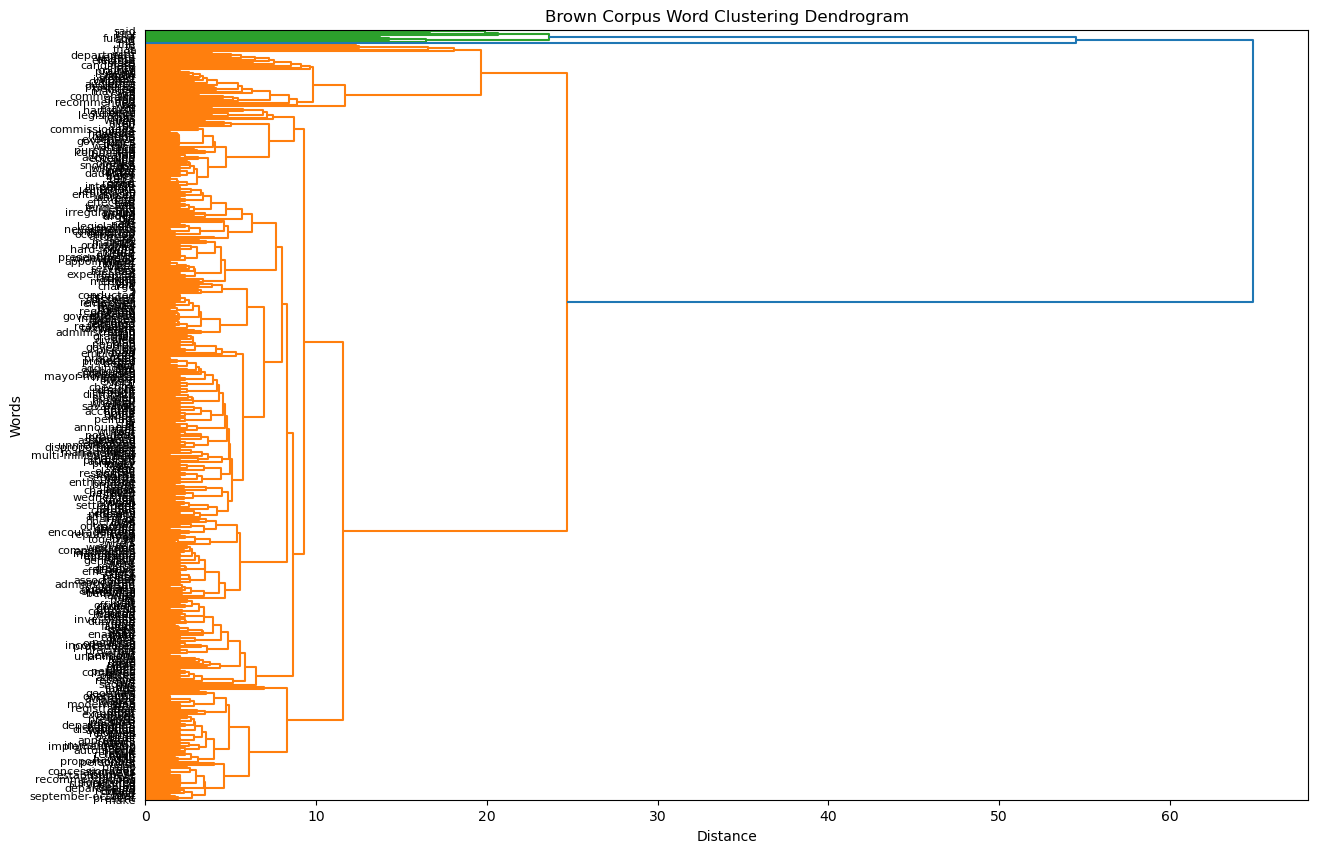

In [48]:
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, labels=vocab, orientation='right', leaf_font_size=8)
plt.xlabel('Distance')
plt.ylabel('Words')
plt.title('Brown Corpus Word Clustering Dendrogram')
plt.show()


### Summary 

- **Brown Corpus** provides a real-world dataset to explore word patterns.
- **Co-occurrence matrices** help capture the context of words.
- **Hierarchical clustering** and **dendrograms** are tools to visualize relationships between words.
- This is the foundation for more advanced NLP models, such as **Word2Vec**, **GloVe**, or **Brown clustering algorithms** used in language modeling.




#### Creating a Co-occurrence Matrix

```python
window_size = 2
co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
```

* Builds a **square matrix** of size *(vocab\_size × vocab\_size)*.
* Each cell $(i, j)$ in the matrix counts how often **word i** appears within the **window** of **word j**.

#### Simulate Brown Clustering

```python
num_clusters = 2
...
```

* Assigns each word to its own cluster initially.
* Iteratively **merges the two most strongly co-occurring clusters**.
* This continues until only the desired number of clusters remains.

#### Final Output

```python
final_clusters[word] = cluster_id
```

* Produces a dictionary of `{word: cluster_id}` showing the grouping of words.

#### What Is a Co-occurrence Matrix?

It’s a matrix where:

* **Rows and columns = words in vocabulary**
* Each cell $M_{i,j}$ contains the **count of times word $i$** appeared near **word $j$**

$$
M_{i,j} = \text{Number of times } w_i \text{ appears in the context window of } w_j
$$

#### 🧭 Summary

| Step                      | What It Does                                  |
| ------------------------- | --------------------------------------------- |
| Corpus                    | Loads a sentence from the Brown Corpus        |
| Vocabulary                | Extracts all unique words                     |
| Co-occurrence Matrix      | Counts how often words appear near each other |
| Brown Clustering (simple) | Merges similar words into clusters            |
| Final Output              | A dictionary of word-to-cluster mappings      |

#### 🌳 Visualizing Brown Clustering with a Dendrogram

#### 📌 Code Recap

```python
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(co_occurrence_matrix, method='ward')
...
dendrogram(linkage_matrix, labels=list(vocab), orientation='right')
```

This code performs **hierarchical clustering** on the **co-occurrence matrix** and displays it as a **dendrogram**.

<br/>

##### 🌱 What Is a Dendrogram?

A **dendrogram** is a **tree-like diagram** that shows how words are grouped into clusters based on their co-occurrence patterns.

* Each **leaf node** (at the left) is a word from the vocabulary.
* Words that **frequently co-occur** are joined into **branches**.
* The **horizontal axis** shows the **distance** (or dissimilarity) between merged clusters.

  * **Shorter horizontal lines** → more similar words
  * **Longer lines** → more dissimilar

<br/>

### 🧠 What This Means

* The dendrogram shows how the words are **grouped step-by-step**.
* It begins by clustering the **most similar pairs of words** (based on co-occurrence).
* Then it merges those groups into larger clusters.

For example:

* `"jury"` and `"election"` might co-occur often → they appear close together.
* `"the"` and `"of"` may appear often but with many different words, making them less specific.

<br/>

### ⚠️ Why Fewer Words?

> The message in the code mentions:
> "you need to experiment it with less words..."

* That’s because **hierarchical clustering** requires computing pairwise distances.
* Large vocabularies make the **linkage matrix** large and slow to process.
* A **small subset** (e.g., 20–30 words) gives a faster and more readable result.

<br/>

### 📊 Summary Table

| Component           | Role                                           |
| ------------------- | ---------------------------------------------- |
| `linkage()`         | Computes distances for hierarchical clustering |
| `dendrogram()`      | Draws the tree structure of word clusters      |
| X-axis (horizontal) | Dissimilarity between word clusters            |
| Y-axis (vertical)   | Words from the vocabulary                      |
| Short branches      | Words with similar co-occurrence contexts      |



---

### 🧠 Introduction to GloVe (Global Vectors for Word Representation)

#### **What is GloVe?**

**Global Vectors for Word Representation (GloVe)** is an unsupervised learning algorithm used **to learn word embeddings** from large amounts of text data. Word embeddings are dense vector representations of words that capture semantic relationships between words based on their co-occurrence statistics. 

**GloVe** is a word embedding model that learns **vector representations of words** by using **global word co-occurrence statistics** from a corpus.


Unlike Word2Vec (which learns embeddings through local context windows), GloVe builds a **co-occurrence matrix** and then learns word vectors from it.

#### **Who developed it and when?**

GloVe was developed by researchers at **Stanford University**:

* **Jeffrey Pennington**, **Richard Socher**, and **Christopher Manning**

It was first introduced in **2014**.

#### **Who currently maintains and supports new releases?**

The official code and pretrained models are available at:

* [https://nlp.stanford.edu/projects/glove](https://nlp.stanford.edu/projects/glove)

GloVe is not actively developed anymore, but the pretrained models are widely used.
Unofficial implementations exist in:

* `Gensim`
* `glove-python` (Python wrapper around original C code)

#### **How do I use GloVe in Python and Jupyter Notebooks?**

There are two common ways:

#### 📦 Option 1: Create a model

#### **What is a model in GloVe?**

A **GloVe model** is a file that contains:

* A large vocabulary of words
* For each word: a **fixed-length vector** (e.g., 50D, 100D, 300D)

These vectors are learned by factorizing a word-word **co-occurrence matrix** so that **similar words** have **similar vectors**.

### **How to Create a GloVe Model Using Python**

> GloVe training is more complex than Word2Vec and originally written in C. But here’s a basic pipeline using `glove-python-binary`:

#### ✅ Step 1: Install the Library

```bash
!pip install glove-python-binary
```

#### ✅ Step 2: Create and Train a GloVe Model

```python
from glove import Corpus, Glove

# Step 1: Prepare your corpus
sentences = [['this', 'is', 'an', 'example'], ['glove', 'is', 'awesome']]

# Step 2: Build a co-occurrence corpus
corpus = Corpus()
corpus.fit(sentences, window=5)

# Step 3: Train the GloVe model
glove_model = Glove(no_components=100, learning_rate=0.05)
glove_model.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove_model.add_dictionary(corpus.dictionary)

# Step 4: Use the model
print(glove_model.word_vectors[glove_model.dictionary['glove']])
print(glove_model.most_similar('glove'))
```

#### 📦 Option 2: Load Pretrained GloVe using Gensim

- Steps: Preprocess the text data.<br>
Created the dictionary.<br>
Traverse the glove file of a specific dimension and compare each word with all words in the dictionary,
if a match occurs, copy the equivalent vector from the glove and paste into embedding_matrix at the corresponding index.<br>


In [19]:
#Download Glove Pretrained Embeddings From: http://nlp.stanford.edu/data/glove.6B.zip  

def embedding_for_vocab(filepath, word_index,
                        embedding_dim):
    vocab_size = len(word_index) + 1
      
    # Adding again 1 because of reserved 0 index
    embedding_matrix_vocab = np.zeros((vocab_size,
                                       embedding_dim))
  
    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index.index(word)
                embedding_matrix_vocab[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
  
    return embedding_matrix_vocab
  
  
# matrix for vocab: tokenized_words
embedding_dim = 50
embedding_matrix_vocab = embedding_for_vocab(
    './glove.6B.50d/glove.6B.50d.txt', tokenized_words,
  embedding_dim)
  
print("Dense vector for first word is => ",
      embedding_matrix_vocab[1])

Dense vector for first word is =>  [-5.79900026e-01 -1.10100001e-01 -1.15569997e+00 -2.99059995e-03
 -2.06129998e-01  4.52890009e-01 -1.66710004e-01 -1.03820002e+00
 -9.92410004e-01  3.98840010e-01  5.92299998e-01  2.29900002e-01
  1.52129996e+00 -1.77640006e-01 -2.97259986e-01 -3.92349988e-01
 -7.84709990e-01  1.55939996e-01  6.90769970e-01  5.95369995e-01
 -4.43399996e-01  5.35139978e-01  3.28530014e-01  1.24370003e+00
  1.29719996e+00 -1.38779998e+00 -1.09249997e+00 -4.09249991e-01
 -5.69710016e-01 -3.46560001e-01  3.71630001e+00 -1.04890001e+00
 -4.67079997e-01 -4.47389990e-01  6.22999994e-03  1.96490008e-02
 -4.01609987e-01 -6.29130006e-01 -8.25060010e-01  4.55909997e-01
  8.26259971e-01  5.70909977e-01  2.11989999e-01  4.68650013e-01
 -6.00269973e-01  2.99199998e-01  6.79440022e-01  1.42379999e+00
 -3.21520008e-02 -1.26029998e-01]


### 🧠 Comparing Wod2Vec against GloVe

| Feature           | Word2Vec                   | GloVe                             |
| ----------------- | -------------------------- | --------------------------------- |
| Learning Approach | Predict context or word    | Count co-occurrences              |
| Local/Global Info | Local context window       | Global co-occurrence statistics   |
| Original Language | Python (gensim)            | C (with Python wrappers)          |
| Use Case          | Word similarity, analogies | Same + clustering + visualization |


## Part 2: **The Workshop**


Push the final notebook to GitHub and send the `.git` URL to the **assignment dropbox** before the end of class.

## 🧠 Learning Objectives
- Teams of 2 (individual evaluation in class).
- Implement **Word2Vec**  and **GloVe** using real-world data during the NLP process.
- Build **Jupyter Notebooks** with well-structured code and clear Markdown documentation.
- Use **Git and GitHub** for collaborative version control and code sharing.
- Identify and articulate coding issues ("**talking points**") and insert them directly into markdown comments.


## 🧩 Workshop Structure (In Class)
1. **Set up teams of 2 people** – Read and understand the workshop, plus submission instructions. Seek assistance if needed.
2. **Jupyter Notebook Development** *(In class)* – NLP Pipeline (if needed) and Probabilistic Model method implementations + Markdown documentation (work as teams)
3. **Push to GitHub** – Teams commit and push the notebook. **Make sure to include your names so it is easy to identify the team that developed the code**.
4. **Instructor Review** - The instructor will go around in class, take notes, and provide coaching as needed, during the **Peer Review Round**


## 💻 Submission Checklist
- ✅ `EmbeddingClusteringVectorizationWorkshop.ipynb` with:
  - Demo code: Document Collection, Tokenizer, Normalization Pipeline on a relevant corpus.
  - Demo code: Implement a Word2Vec predictive model using the knowledge corpus.
  - Demo code: Implement a GloVe count-based model using the knowledge corpus.
  - Markdown explanations for each major step
  - In a table that compare **Word2Vec** against **GloVe** in the context of the use case that makes use of the knowledge corpus.
- ✅ `README.md` with:
  - Dataset description
  - Team member names
  - Link to the dataset and license (if public)
- ✅ GitHub Repo:
  - Public repo named `EmbeddingClusteringVectorizationWorkshop`
  - **Markdowns and meaningful talking points**